# Step 1: Data Preprocessing

In [1]:
# import packages

# Pre-processing
import glob
import random
import re
import nltk
# nltk.download('stopwords')
# !pip3 install stemming
from stemming.porter2 import stem
from nltk.corpus import stopwords
import string
import pandas as pd
import numpy as np


In [2]:
filepath = glob.glob("amazon-meta.txt")
fil = filepath[0]
text = open(fil,'r',encoding='utf-8',errors='ignore')


In [3]:
amazon = {}
# Declaring the tuple of various feature values
(Id, ASIN, title, categories, group, connections, salesrank, tot_reviews, avg_rating, degree_centrality, clustering_coeff) = ("","","","","","", 0, 0, 0.0, 0, 0.0)

for line in text:
    line = line.strip()
    # Strip ID
    if(line.startswith("Id")):
        Id = line[3:].strip()
    # Strip ASIN, which is the node
    elif(line.startswith("ASIN")):
        ASIN = line[5:].strip()
    # Strip Title
    elif(line.startswith("title")):
        title = line[6:].strip()
        title = ' '.join(title.split())
    # Strip Group
    elif(line.startswith("group")):
        group = line[6:].strip()
    # Strip sales rank
    elif(line.startswith("salesrank")):
        salesrank = line[10:]
    # Strip similar, which are the connections
    elif(line.startswith("similar")):
        a = line.split()
        connections = ' '.join([i for i in a[2:]])
    # Strip categories
    elif(line.startswith("categories")):
        b = line.split()
        # Converted to lowercase
        categories = ' '.join((text.readline()).lower() for i in range(int(b[1].strip())))
        # Remove punctuations
        categories = re.compile('[%s]' % re.escape(string.digits + string.punctuation)).sub(' ', categories)
        # Remove stopwords
        categories = ' '.join(set(categories.split()) - set(stopwords.words('english')))
        # Concatenate the words
        categories = ' '.join(stem(word) for word in categories.split())
    # Count the reviews, and average rating
    elif(line.startswith("reviews")):
        c = line.split()
        tot_reviews = c[2].strip()
        avg_rating = c[7].strip()
    # Handling the exception for cases where instances are missing
    elif(line==""):
        try:
            exception = {}
            if(ASIN!=""):
                amazon[ASIN] = exception
            exception['Id'] = Id
            exception['ASIN'] = ASIN
            exception['title'] = title
            exception['group'] = group
            exception['categories'] = ' '.join(set(categories.split()))
            exception['connections'] = connections
            exception['salesrank'] = int(salesrank)
            exception['tot_reviews'] = int(tot_reviews)
            exception['avg_rating'] = float(avg_rating)
            exception['degree_centrality'] = degree_centrality
            exception['clustering_coeff'] = clustering_coeff
        except NameError:
            continue
        (Id, ASIN, title, categories, group, connections, salesrank, tot_reviews, avg_rating, degree_centrality, clustering_coeff) = ("","","","","","", 0, 0, 0.0, 0, 0.0)
text.close()




In [4]:
# Subset of music products in the dataset
amazon_music = {}
for key, value in amazon.items():
  # Check for the case where value is "Music", and only then choose
    amazon[key]['connections'] = ' '.join([connection for connection in value['connections'].split() if connection in amazon.keys()])

    amazon[key]['co_product_count'] = len(amazon[key]['connections'].split())
#     if(value['group'] == "Music"):
#         amazon_music[key] = amazon[key]

# # Join the connections
# for key, value in amazon_music.items():
#     amazon_music[key]['connections'] = ' '.join([connection for connection in value['connections'].split() if connection in amazon_music.keys()])
#     amazon_music[key]['co_product_count'] = len(amazon_music[key]['connections'].split())

# Convert to dataframe
# amazon_music_df = pd.DataFrame.from_dict(amazon_music)
# amazon_music_df = amazon_music_df.transpose()

# amazon_music_df
amazon_df=pd.DataFrame.from_dict(amazon).transpose()
amazon_df


,Id,ASIN,title,group,categories,connections,salesrank,tot_reviews,avg_rating,degree_centrality,clustering_coeff,co_product_count
0771044445,0,0771044445,,,,,0,0,0.0,0,0.0,0
0827229534,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,religion spiritu clergi sermon christian preac...,0804215715 156101074X 0687023955 0687074231 08...,396585,2,5.0,0,0.0,5
0738700797,2,0738700797,Candlemas: Feast of Flames,Book,witchcraft wicca religion base spiritu earth s...,0738700827 1567184960 1567182836 0738700525 07...,168596,12,4.5,0,0.0,5
0486287785,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,garden hobbi general home subject craft book,,1270652,1,5.0,0,0.0,0
0842328327,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,commentari refer religion discipleship applic ...,0842328130 0842330313 0842328610 0842328572,631289,1,4.0,0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
B000059TOC,548547,B000059TOC,The Drifter,DVD,store actor amazon deal genr ann timothi horro...,630366704X,0,1,5.0,0,0.0,1
B00006JBIX,548548,B00006JBIX,The House Of Morecock,DVD,featur art store titl specialti intern distrib...,B00004WZQN,0,8,3.0,0,0.0,1
0879736836,548549,0879736836,Catholic Bioethics and the Gift of Human Life,Book,scienc philosophi religion spiritu sociolog hi...,1580510469 0896229939,0,1,4.0,0,0.0,2
B00008DDST,548550,B00008DDST,"1, 2, 3 Soleils: Taha, Khaled, Faudel",DVD,featur store categori com today concert outlet...,,0,3,5.0,0,0.0,0


# Data Statistics and Feature Correlation

In [5]:
# Group-wise count data frame
count_df=amazon_df.groupby(['group'])['group'].count()
count_df

group
                  5868
Baby Product         1
Book            393561
CE                   4
DVD              19828
Music           103144
Software             5
Sports               1
Toy                  8
Video            26131
Video Games          1
Name: group, dtype: int64

In [6]:
# Number of products as co purchasing products

print(amazon_df['connections'].replace('', np.nan).count())

361567


In [7]:
# Average count of co purchase products
print(amazon_df['co_product_count'].mean())

2.2448901836106696



Sales Rank and Co Product Count Correlation:  0.4392765003033161


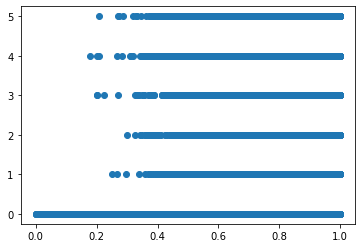

In [8]:
import seaborn as sns
amazon_df['normed_sales'] = 1 - (amazon_df['salesrank'] /amazon_df['salesrank'].abs().max())

corr=amazon_df['co_product_count'].astype(float).corr(amazon_df['normed_sales'].astype(float))
print("\nSales Rank and Co Product Count Correlation: ",corr)
from matplotlib import pyplot
pyplot.scatter(amazon_df['normed_sales'], amazon_df['co_product_count'])
pyplot.show()


Average Rating and Co Product Count Correlation:  0.34933220676002275


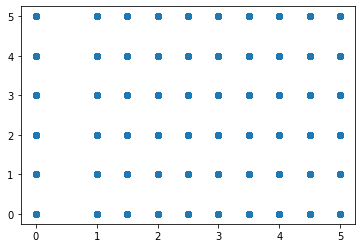

In [9]:
corr=amazon_df['co_product_count'].astype(float).corr(amazon_df['avg_rating'].astype(float))
print("\nAverage Rating and Co Product Count Correlation: ",corr)
from matplotlib import pyplot
pyplot.scatter(amazon_df['avg_rating'], amazon_df['co_product_count'])
pyplot.show()

In [10]:
import networkx as nx
import scipy


# Dataset analysis pair wise analysis
# Evaluating the similarity between two connected nodes
connections_graph = nx.Graph()
# Add the nodes
for key, value in amazon.items():
  connections_graph.add_node(key)
  for i in value['connections'].split():
    # Add the respective connected nodes
    connections_graph.add_node(i.strip())
    similarity = 0
    try:
      # Set of words in the node's categorical description
      set_1 = set(amazon[key]['categories'].split())
      # Set of words is node's connections' categorical description
      set_2 = set(amazon[i]['categories'].split())
    except KeyError:
      continue
    # Calculating intersection and union
    union = set_1 & set_2
    intersection = set_1 | set_2
    if(len(union)) > 0:
      # Similarity is the ratio of intersection with union. The more common items, the higher the intersection, and similarity
      similarity = round(len(intersection)/len(union),2)
    connections_graph.add_edge(key, i.strip(), weight=similarity)

In [11]:
# !pip install 'scipy==1.8.0'
# !pip install 'networkx==2.6'
A = nx.adjacency_matrix(connections_graph)


# Apply Item based Collaborative filtering

In [12]:
# Consider the first 10 most similar connections for each of the product based on 
# similarity rating that is computed above.

mat = A.toarray()


In [20]:
# That counts actual categories that are present in the connections list by using category similarity matching
actual_count =0

for i in range(len(mat)):
    sorted_idx =mat[1].argsort()[::-1][:10]
    for j in sorted_idx:
        if amazon_df.iloc[j]['ASIN'] in amazon_df.iloc[i]['connections'].split():
            actual_count+=1
        
        
    

print(actual_count)

                                                

477240


In [24]:
# Compute accuracy

accuracy = actual_count/len(amazon_df)
accuracy

0.8699995624845046

In [30]:
# To increase the accuracy we can perform group collaborative filtering 
# we will now apply group based collaborative filtering for each of the above groups

# Considering amazon music
amazon_music_df = amazon_df[amazon_df['group'] == 'Music']
amazon_music_df

,Id,ASIN,title,group,categories,connections,salesrank,tot_reviews,avg_rating,degree_centrality,clustering_coeff,co_product_count,normed_sales
B00000AU3R,7,B00000AU3R,Batik,Music,store import specialti modern postbebop genera...,B0000261KX B00006AM8D B000059OB9,5392,3,4.5,0,0.0,3,0.99858
B00004W1W1,14,B00004W1W1,Later...,Music,store specialti indi general jazz music style,,390624,0,0.0,0,0.0,0,0.89716
B000007R0T,18,B000007R0T,Sol to Soul,Music,general jazz music style,B000059QC1 B00000JQIE B000002L7F,109301,15,5.0,0,0.0,3,0.971224
B00005NTSV,22,B00005NTSV,Come What May,Music,store broadway specialti indi general jazz pop...,B00000JCDS B000004CSZ B00005LLY3,83369,4,4.5,0,0.0,3,0.978051
B000002O8D,34,B000002O8D,Southern By the Grace of God: Lynyrd Skynyrd T...,Music,orient blue classic arena southern rock live m...,B0000061RJ B00005NWLO,89264,6,4.0,0,0.0,2,0.976499
...,...,...,...,...,...,...,...,...,...,...,...,...,...
B00005AUTO,548509,B00005AUTO,Door Door,Music,new punk wave post altern music rock style,,-1,1,5.0,0,0.0,0,1.0
B00004XT2L,548536,B00004XT2L,Improvisations - Jazz In Paris,Music,general jazz swing music style,B000051TKB B0000046U5 B000000EC9 B00000616B B0...,0,3,5.0,0,0.0,5,1.0
B000065AHM,548544,B000065AHM,Lucky Man,Music,store blue specialti indi general contemporari...,,0,1,5.0,0,0.0,0,1.0
B0000508ZN,548545,B0000508ZN,I Need Your Loving,Music,store tranc specialti indi general dj danc mus...,,0,1,1.0,0,0.0,0,1.0


In [31]:
# Compute the prediction for just the amazon music 
connections_graph = nx.Graph()
# Add the nodes
for key, value in amazon_music.items():
  connections_graph.add_node(key)
  for i in value['connections'].split():
    # Add the respective connected nodes
    connections_graph.add_node(i.strip())
    similarity = 0
    try:
      # Set of words in the node's categorical description
      set_1 = set(amazon_music[key]['categories'].split())
      # Set of words is node's connections' categorical description
      set_2 = set(amazon_music[i]['categories'].split())
    except KeyError:
      continue
    # Calculating intersection and union
    union = set_1 & set_2
    intersection = set_1 | set_2
    if(len(union)) > 0:
      # Similarity is the ratio of intersection with union. The more common items, the higher the intersection, and similarity
      similarity = round(len(intersection)/len(union),2)
    connections_graph.add_edge(key, i.strip(), weight=similarity)

A = nx.adjacency_matrix(connections_graph)
mat = A.toarray()



In [33]:
actual_count =0

for i in range(len(mat)):
    sorted_idx =mat[1].argsort()[::-1][:10]
    for j in sorted_idx:
        if amazon_music_df.iloc[j]['ASIN'] in amazon_music_df.iloc[i]['connections'].split():
            actual_count+=1
        
print(actual_count)

94091


In [35]:
# Compute accuracy

accuracy = actual_count/len(amazon_music_df)
accuracy

0.9122295043822229

In [37]:
# We can now modify the above similarity function by adding a union and intersection of group within the jaccard similarity measure
# The code after modifications becomes


connections_graph = nx.Graph()
# Add the nodes
for key, value in amazon.items():
  connections_graph.add_node(key)
  for i in value['connections'].split():
    # Add the respective connected nodes
    connections_graph.add_node(i.strip())
    similarity = 0
    try:
      # Set of words in the node's categorical description
      set_1 = set(amazon[key]['categories'].split())
      # Set of words is node's connections' categorical description
      set_2 = set(amazon[i]['categories'].split())
        
      # this set will just have the group name
      set_3 = set(amazon[key]['group'])
    except KeyError:
      continue
    # Calculating intersection and union
    union = set_1 & set_2 & set_3
    intersection = set_1 | set_2 | set_3
    if(len(union)) > 0:
      # Similarity is the ratio of intersection with union. The more common items, the higher the intersection, and similarity
      similarity = round(len(intersection)/len(union),2)
    connections_graph.add_edge(key, i.strip(), weight=similarity)

A = nx.adjacency_matrix(connections_graph)
mat = A.toarray()


In [38]:
# After this modifications let us check the actual prediction count of every group

actual_count =0

for i in range(len(mat)):
    sorted_idx =mat[1].argsort()[::-1][:10]
    for j in sorted_idx:
        if amazon_df.iloc[j]['ASIN'] in amazon_df.iloc[i]['connections'].split():
            actual_count+=1
        
        
    

print(actual_count)

486784


In [39]:
accuracy = actual_count/len(amazon_df)
accuracy

0.8873980953492103

In [40]:
# Now we can also make use of the title feature to perform similarity


# Similarity on title feature using TF-IDF Vector

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(amazon_df['title'])
print(x)

  (1, 83432)	0.5166241892286666
  (1, 85712)	0.5497582881206091
  (1, 75373)	0.47792022573097376
  (1, 68187)	0.1409515661374886
  (1, 71339)	0.4273057284745481
  (2, 36354)	0.5127706103384814
  (2, 35287)	0.4830846826817856
  (2, 16681)	0.6976623609032268
  (2, 68187)	0.1302410100938849
  (3, 17110)	0.33503870357088716
  (3, 97273)	0.3754946676011876
  (3, 73649)	0.44758982206663006
  (3, 35819)	0.4013881168569187
  (3, 5279)	0.44067700273183313
  (3, 47098)	0.28000340820283487
  (3, 102940)	0.25585123990589753
  (3, 105054)	0.21736091239625213
  (4, 96439)	0.5111189755577239
  (4, 96280)	0.4937192521960117
  (4, 6121)	0.26766885700184423
  (4, 21293)	0.3654445795617071
  (4, 12031)	0.2861055746235847
  (4, 7133)	0.3879990129432947
  (4, 55652)	0.2395886082860885
  (5, 33964)	0.42342195560163814
  :	:
  (548548, 63567)	0.8864312077731291
  (548548, 45949)	0.41092803768657443
  (548548, 95437)	0.13414164403809647
  (548548, 68187)	0.16548075738190612
  (548549, 12336)	0.574063133117450

In [1]:
# Lets generate the cosine similarity of the title
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(x, x)


In [2]:
def get_krecommendations_isbns(isbn,k, cosine_sim,indices):
    # Get the index of the movie that matches the title
    idx = indices[isbn]
    # Get the pairwsie similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the scores for k most similar movies
    sim_scores = sim_scores[1:k]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    # Return the top 10 most similar movies
    return amazon_df['connections'].iloc[movie_indices]


In [3]:
# Get top 10 movies for each matching the title 
# Compute correctly matched isbn connections

actual_count =0

for i in amazon_df['ISBN']:
    for j in get_krecommendations_isbns(i,10,cosine_sim,indices):
        if j in amazon_df.iloc[i]['connections'].split():
            actual_count+=1
        
        
    

print(actual_count)

432613


In [5]:
accuracy = actual_count/len(amazon_df)
accuracy

0.7886453791071767

In [6]:
# Hence from this we can conclude that the accuracy of combination of group and category similarity matching is much higher than
# that of the title similaity matching

In [7]:
# Lets combine using ensemble method both the methods 

# Ensemble method using max voting

In [9]:
# here, I will be checking a particular isbn with both group + category and title similarity
# If there are no connections using group + category then I will check for title similarity
# The combine code becomes

actual_count =0

for i in range(len(mat)):
    sorted_idx =mat[1].argsort()[::-1][:10]
    for j in sorted_idx:
        if amazon_df.iloc[j]['ASIN'] in amazon_df.iloc[i]['connections'].split():
            actual_count+=1
        else:
            for j in get_krecommendations_isbns(i,10,cosine_sim,indices):
                if j in amazon_df.iloc[i]['connections'].split():
                    actual_count+=1
print(actual_count)

519186


In [12]:
accuracy = actual_count/len(amazon_df)
accuracy

0.9464663331826335